In [114]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mutual_info_score 
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

# Razumevanje podataka 

In [50]:
dataset = pd.read_csv('C://Users//USER//Desktop//train.csv')

In [53]:
dataset.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [109]:
dataset.shape

(59381, 128)

In [55]:
dataset.dtypes

Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
                        ...   
Medical_Keyword_20       int64
Medical_

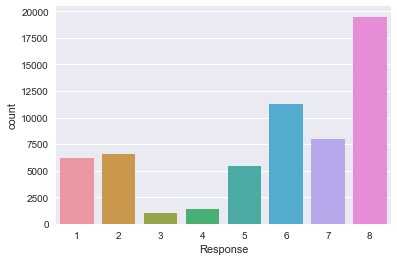

In [88]:
sns.set(style="darkgrid")
#fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
#plt.title("Countplot za target varijablu", fontsize=10)
ax = sns.countplot(y, data=dataset)

In [89]:
np.corrcoef(dataset['Ht'], dataset['BMI'])

array([[ 1.        ,  0.12312475],
       [ 0.12312475,  1.        ]])

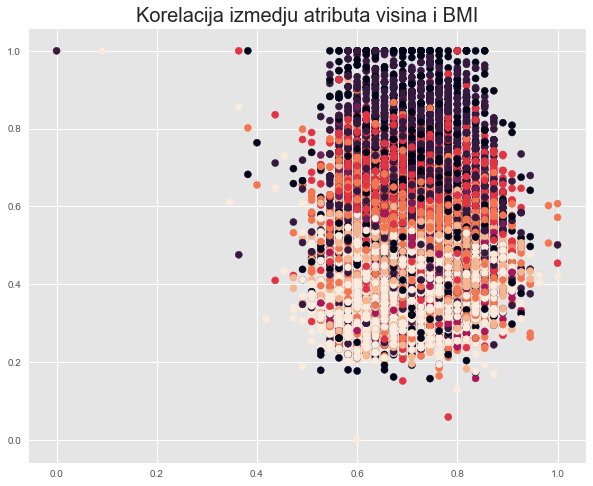

In [91]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
plt.title("Korelacija izmedju atributa visina i BMI", fontsize=20)
plt.scatter(dataset['Ht'], dataset['BMI'],c = dataset['Response']) 
plt.show() 

In [92]:
np.corrcoef(dataset['Ins_Age'], dataset['BMI'])

array([[ 1.       ,  0.1370757],
       [ 0.1370757,  1.       ]])

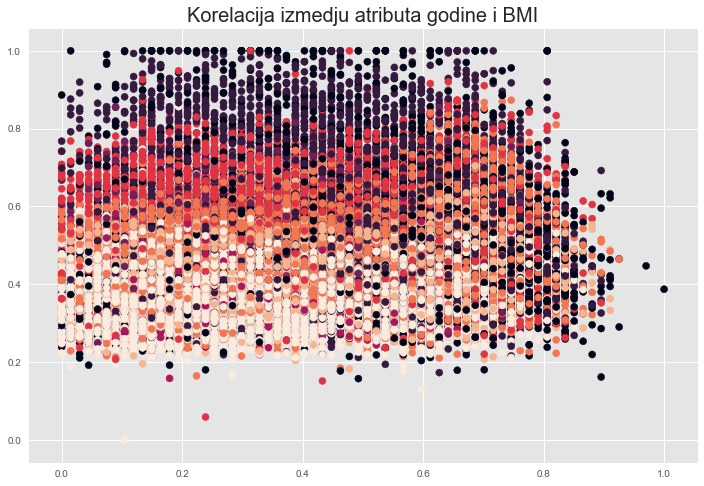

In [93]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,8)) # Sample figsize in inches
plt.title("Korelacija izmedju atributa godine i BMI",fontsize=20)
#plt.legend(('Ins_Age','BMI','Response'),('Ins_Age','BMI','Response'),scatterpoints=1, loc='lower right', ncol=3, fontsize=8)
plt.scatter(dataset['Ins_Age'], dataset['BMI'], c = dataset['Response'])
plt.show()

In [94]:
np.corrcoef(dataset['Wt'], dataset['BMI'])

array([[ 1.        ,  0.85408334],
       [ 0.85408334,  1.        ]])

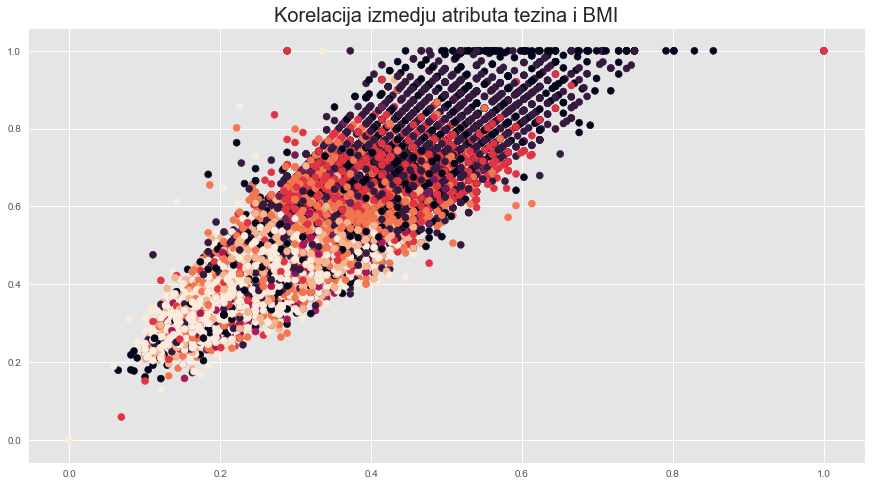

In [95]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,8)) 
plt.title("Korelacija izmedju atributa tezina i BMI", fontsize=20)
plt.scatter(dataset['Wt'], dataset['BMI'], c = dataset['Response'])
plt.show()

In [96]:
corr_matrix = dataset.corr().abs() 

In [97]:
print(corr_matrix) 

                           Id  Product_Info_1  Product_Info_3  Product_Info_4  \
Id                   1.000000        0.002870        0.001869        0.002914   
Product_Info_1       0.002870        1.000000        0.027573        0.059829   
Product_Info_3       0.001869        0.027573        1.000000        0.048775   
Product_Info_4       0.002914        0.059829        0.048775        1.000000   
Product_Info_5       0.004195        0.069720        0.025419        0.040433   
Product_Info_6       0.005038        0.078684        0.018855        0.089075   
Product_Info_7       0.002117        0.012169        0.015581        0.051542   
Ins_Age              0.001764        0.077429        0.001005        0.261356   
Ht                   0.003674        0.052720        0.293546        0.141780   
Wt                   0.005648        0.004035        0.213546        0.028041   
BMI                  0.004287        0.037130        0.083288        0.129369   
Employment_Info_1    0.00487

In [98]:
high_corr_var=np.where(corr_matrix>0.983)

In [99]:
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [100]:
print(high_corr_var)

[('Medical_History_6', 'Medical_Keyword_48'), ('Medical_History_25', 'Medical_History_26'), ('Medical_History_33', 'Medical_Keyword_23')]


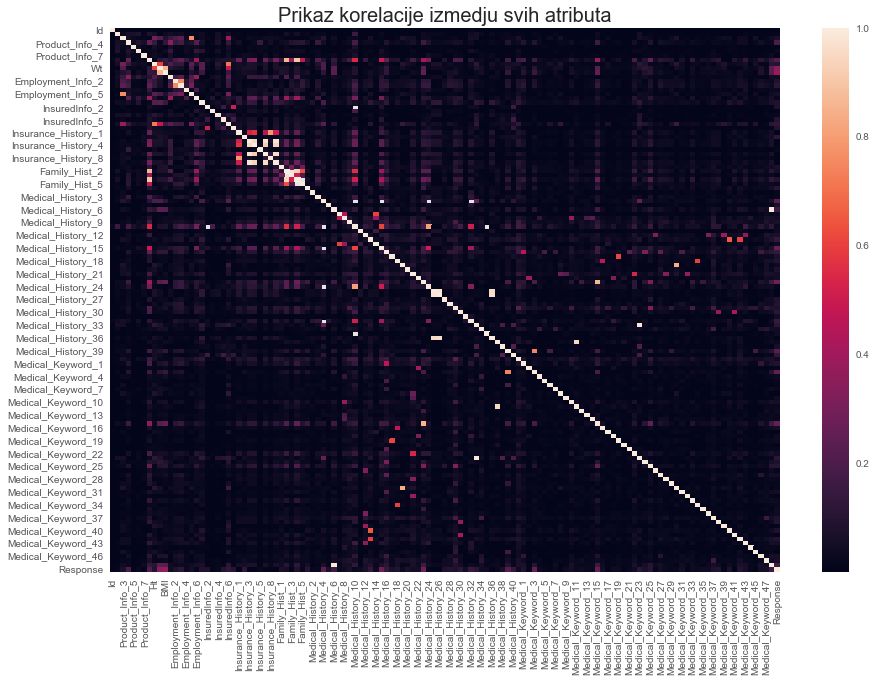

In [101]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
plt.title("Prikaz korelacije izmedju svih atributa", fontsize=20)
sns.heatmap(data=corr_matrix)

In [112]:
corr_matrix1 = dataset.corr().abs() 

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
os = (corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
#first element of os series is the pair with the bigest correlation

In [113]:
os.nlargest(10)

Medical_History_6    Medical_Keyword_48     0.993101
Medical_History_33   Medical_Keyword_23     0.993030
Medical_History_25   Medical_History_26     0.987910
Insurance_History_3  Insurance_History_9    0.982598
                     Insurance_History_7    0.974910
Medical_History_26   Medical_History_36     0.965349
Insurance_History_7  Insurance_History_9    0.962528
Medical_History_25   Medical_History_36     0.954110
Medical_History_37   Medical_Keyword_11     0.950069
Insurance_History_3  Insurance_History_4    0.949388
dtype: float64

In [121]:
X1 = dataset1.drop(['Id', 'Response','Product_Info_2'], axis=1)

In [122]:
X2 = X.select_dtypes(exclude=['object'])

In [123]:
mutual_infos=pd.DataFrame()

In [125]:
for i in range(X2.shape[1]):
    mutual_infos=mutual_infos.append(pd.concat([pd.Series(X2.columns[i]),pd.Series(mutual_info_classif(X2.iloc[:,i:i+1], y))],axis=1))

In [126]:
mutual_infos.nlargest(5,columns=1)

,0,1
0,BMI,0.227392
0,Wt,0.149636
0,Medical_History_15,0.147013
0,Medical_History_4,0.079528
0,Medical_History_23,0.077840


In [102]:
np.corrcoef(dataset['Medical_History_6'], dataset['Medical_Keyword_48'])

array([[ 1.        , -0.99310134],
       [-0.99310134,  1.        ]])

In [103]:
pd.crosstab(dataset['Medical_History_6'], dataset['Medical_Keyword_48'])

Medical_Keyword_48,0,1
Medical_History_6,,
1,37,3231
2,2,0
3,56106,5


In [105]:
np.corrcoef(dataset['Medical_History_33'], dataset['Medical_Keyword_23'])

array([[ 1.        , -0.99302955],
       [-0.99302955,  1.        ]])

In [106]:
pd.crosstab(dataset['Medical_History_33'], dataset['Medical_Keyword_23'])

Medical_Keyword_23,0,1
Medical_History_33,,
1,34,5767
3,53541,39


In [107]:
np.corrcoef(dataset['Medical_History_25'], dataset['Medical_History_26'])

array([[ 1.        , -0.98790996],
       [-0.98790996,  1.        ]])

In [108]:
pd.crosstab(dataset['Medical_History_25'], dataset['Medical_History_26'])

Medical_History_26,1,2,3
Medical_History_25,,,
1,0,0,48040
2,3,11101,1
3,0,236,0


# Priprema podataka

In [56]:
dataset.isnull().sum()

Id                         0
Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         19
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       6779
Employment_Info_5          0
Employment_Info_6      10854
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    25396
                       ...  
Medical_Keyword_20         0
Medical_Keyword_21         0
Medical_Keyword_22         0
Medical_Keywor

In [57]:
dataset1 =  dataset.fillna(dataset.mean())

In [58]:
dataset1

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8
5,10,1,D2,26,0.230769,3,1,1,0.507463,0.836364,...,0,0,0,0,0,0,0,0,0,8
6,11,1,A8,10,0.166194,2,3,1,0.373134,0.581818,...,0,0,0,0,0,0,0,0,0,8
7,14,1,D2,26,0.076923,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,1
8,15,1,D3,26,0.230769,2,3,1,0.522388,0.618182,...,0,0,0,0,0,0,0,0,0,8
9,16,1,E1,21,0.076923,2,3,1,0.552239,0.600000,...,0,0,0,0,0,0,0,0,0,1


In [59]:
dataset1.isnull().sum()

Id                     0
Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
                      ..
Medical_Keyword_20     0
Medical_Keyword_21     0
Medical_Keyword_22     0
Medical_Keyword_23     0
Medical_Keyword_24     0
Medical_Keyword_25     0
Medical_Keyword_26     0
Medical_Keyword_27     0
Medical_Keyword_28     0


In [60]:
X = dataset1.drop(['Id', 'Response'], axis=1)

In [61]:
X

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,0
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0
3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,0
4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,0
5,1,D2,26,0.230769,3,1,1,0.507463,0.836364,0.299163,...,0,0,0,0,0,0,0,0,0,0
6,1,A8,10,0.166194,2,3,1,0.373134,0.581818,0.173640,...,0,0,0,0,0,0,0,0,0,0
7,1,D2,26,0.076923,2,3,1,0.611940,0.781818,0.403766,...,0,0,0,0,0,0,0,0,0,0
8,1,D3,26,0.230769,2,3,1,0.522388,0.618182,0.184100,...,0,0,0,0,0,0,0,0,0,0
9,1,E1,21,0.076923,2,3,1,0.552239,0.600000,0.284519,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y = dataset1['Response']

In [63]:
y

0        8
1        4
2        8
3        8
4        8
5        8
6        8
7        1
8        8
9        1
10       6
11       2
12       7
13       3
14       8
15       5
16       8
17       7
18       2
19       8
20       8
21       5
22       5
23       8
24       6
25       8
26       6
27       8
28       7
29       6
        ..
59351    5
59352    6
59353    6
59354    6
59355    6
59356    6
59357    6
59358    6
59359    6
59360    5
59361    2
59362    7
59363    6
59364    1
59365    5
59366    8
59367    6
59368    8
59369    2
59370    4
59371    6
59372    2
59373    8
59374    7
59375    8
59376    4
59377    7
59378    8
59379    8
59380    7
Name: Response, Length: 59381, dtype: int64

In [127]:
Product_info_2_char=[]
Product_info_2_number=[]
for i in range(len(dataset1['Product_Info_2'])):
    Product_info_2_char.append(dataset1['Product_Info_2'][i][0])
    Product_info_2_number.append(dataset1['Product_Info_2'][i][1])
dataset1['Product_Info_2_char']=Product_info_2_char
dataset1['Product_Info_2_number']=Product_info_2_number


In [128]:
dataset1.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Product_Info_2_char,Product_Info_2_number,Medical_keywords_sum
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,8,D,3,0
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,4,A,1,0
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,8,E,1,0
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,8,D,4,1
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,8,D,2,0


In [129]:
dataset1['Medical_keywords_sum']= dataset1.iloc[:, dataset1.columns.get_loc("Medical_Keyword_1"):dataset1.columns.get_loc("Medical_Keyword_48")].sum(axis=1)

In [130]:
dataset1.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Product_Info_2_char,Product_Info_2_number,Medical_keywords_sum
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,8,D,3,0
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,4,A,1,0
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,8,E,1,0
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,8,D,4,1
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,8,D,2,0


In [167]:
#dataset2 = dataset1.corr(method='pearson', min_periods=1) 

# Modelovanje i evaluacija rešenja

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
RF=RandomForestClassifier(n_estimators=50, max_depth=7)

In [20]:
rf_model=RF.fit(X2, y)

In [77]:
predictions_rf= rf_model.predict(X2)

In [137]:
print(rf_model.feature_importances_)

[  6.40266487e-04   3.14076433e-03   6.85014523e-02   3.52236317e-05
   2.30747273e-04   1.16482596e-04   2.51006006e-02   1.32561260e-02
   1.12552077e-01   2.34555861e-01   3.82172748e-03   4.13190507e-03
   3.31407960e-03   1.21203306e-03   2.08645990e-04   2.46386621e-03
   1.81694446e-03   1.36594201e-03   7.70903261e-04   3.74687124e-04
   1.41961191e-03   2.33317308e-02   1.40268122e-03   5.37157917e-04
   2.06865434e-03   4.44275866e-04   6.15306308e-04   2.14654065e-03
   6.23397892e-04   4.21214854e-04   5.87941478e-04   3.16414023e-03
   7.41838641e-03   3.99040481e-03   2.06065353e-02   5.95267377e-03
   9.36485828e-03   1.57440872e-03   4.73167771e-04   9.81067790e-02
   6.24064442e-04   6.14948522e-03   3.21871504e-04   3.64958068e-04
   2.74165378e-04   2.94558637e-04   1.43798845e-04   1.77007657e-04
   3.31426207e-03   1.25005555e-04   6.82615333e-02   4.89365460e-03
   1.33554475e-04   8.92938052e-04   1.76599410e-04   3.58878742e-04
   2.13792211e-04   1.65367321e-04

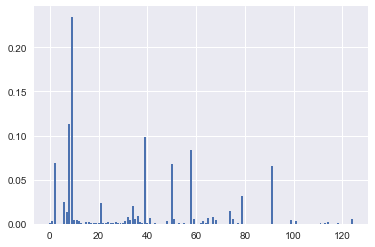

In [80]:
plt.bar(range(len(rf_model.feature_importances_)), rf_model.feature_importances_)
plt.show()

In [55]:
imp = rf_model.feature_importances_

In [56]:
names = dataset1.columns

In [57]:
imp,names = zip(*sorted(zip(imp, names)))

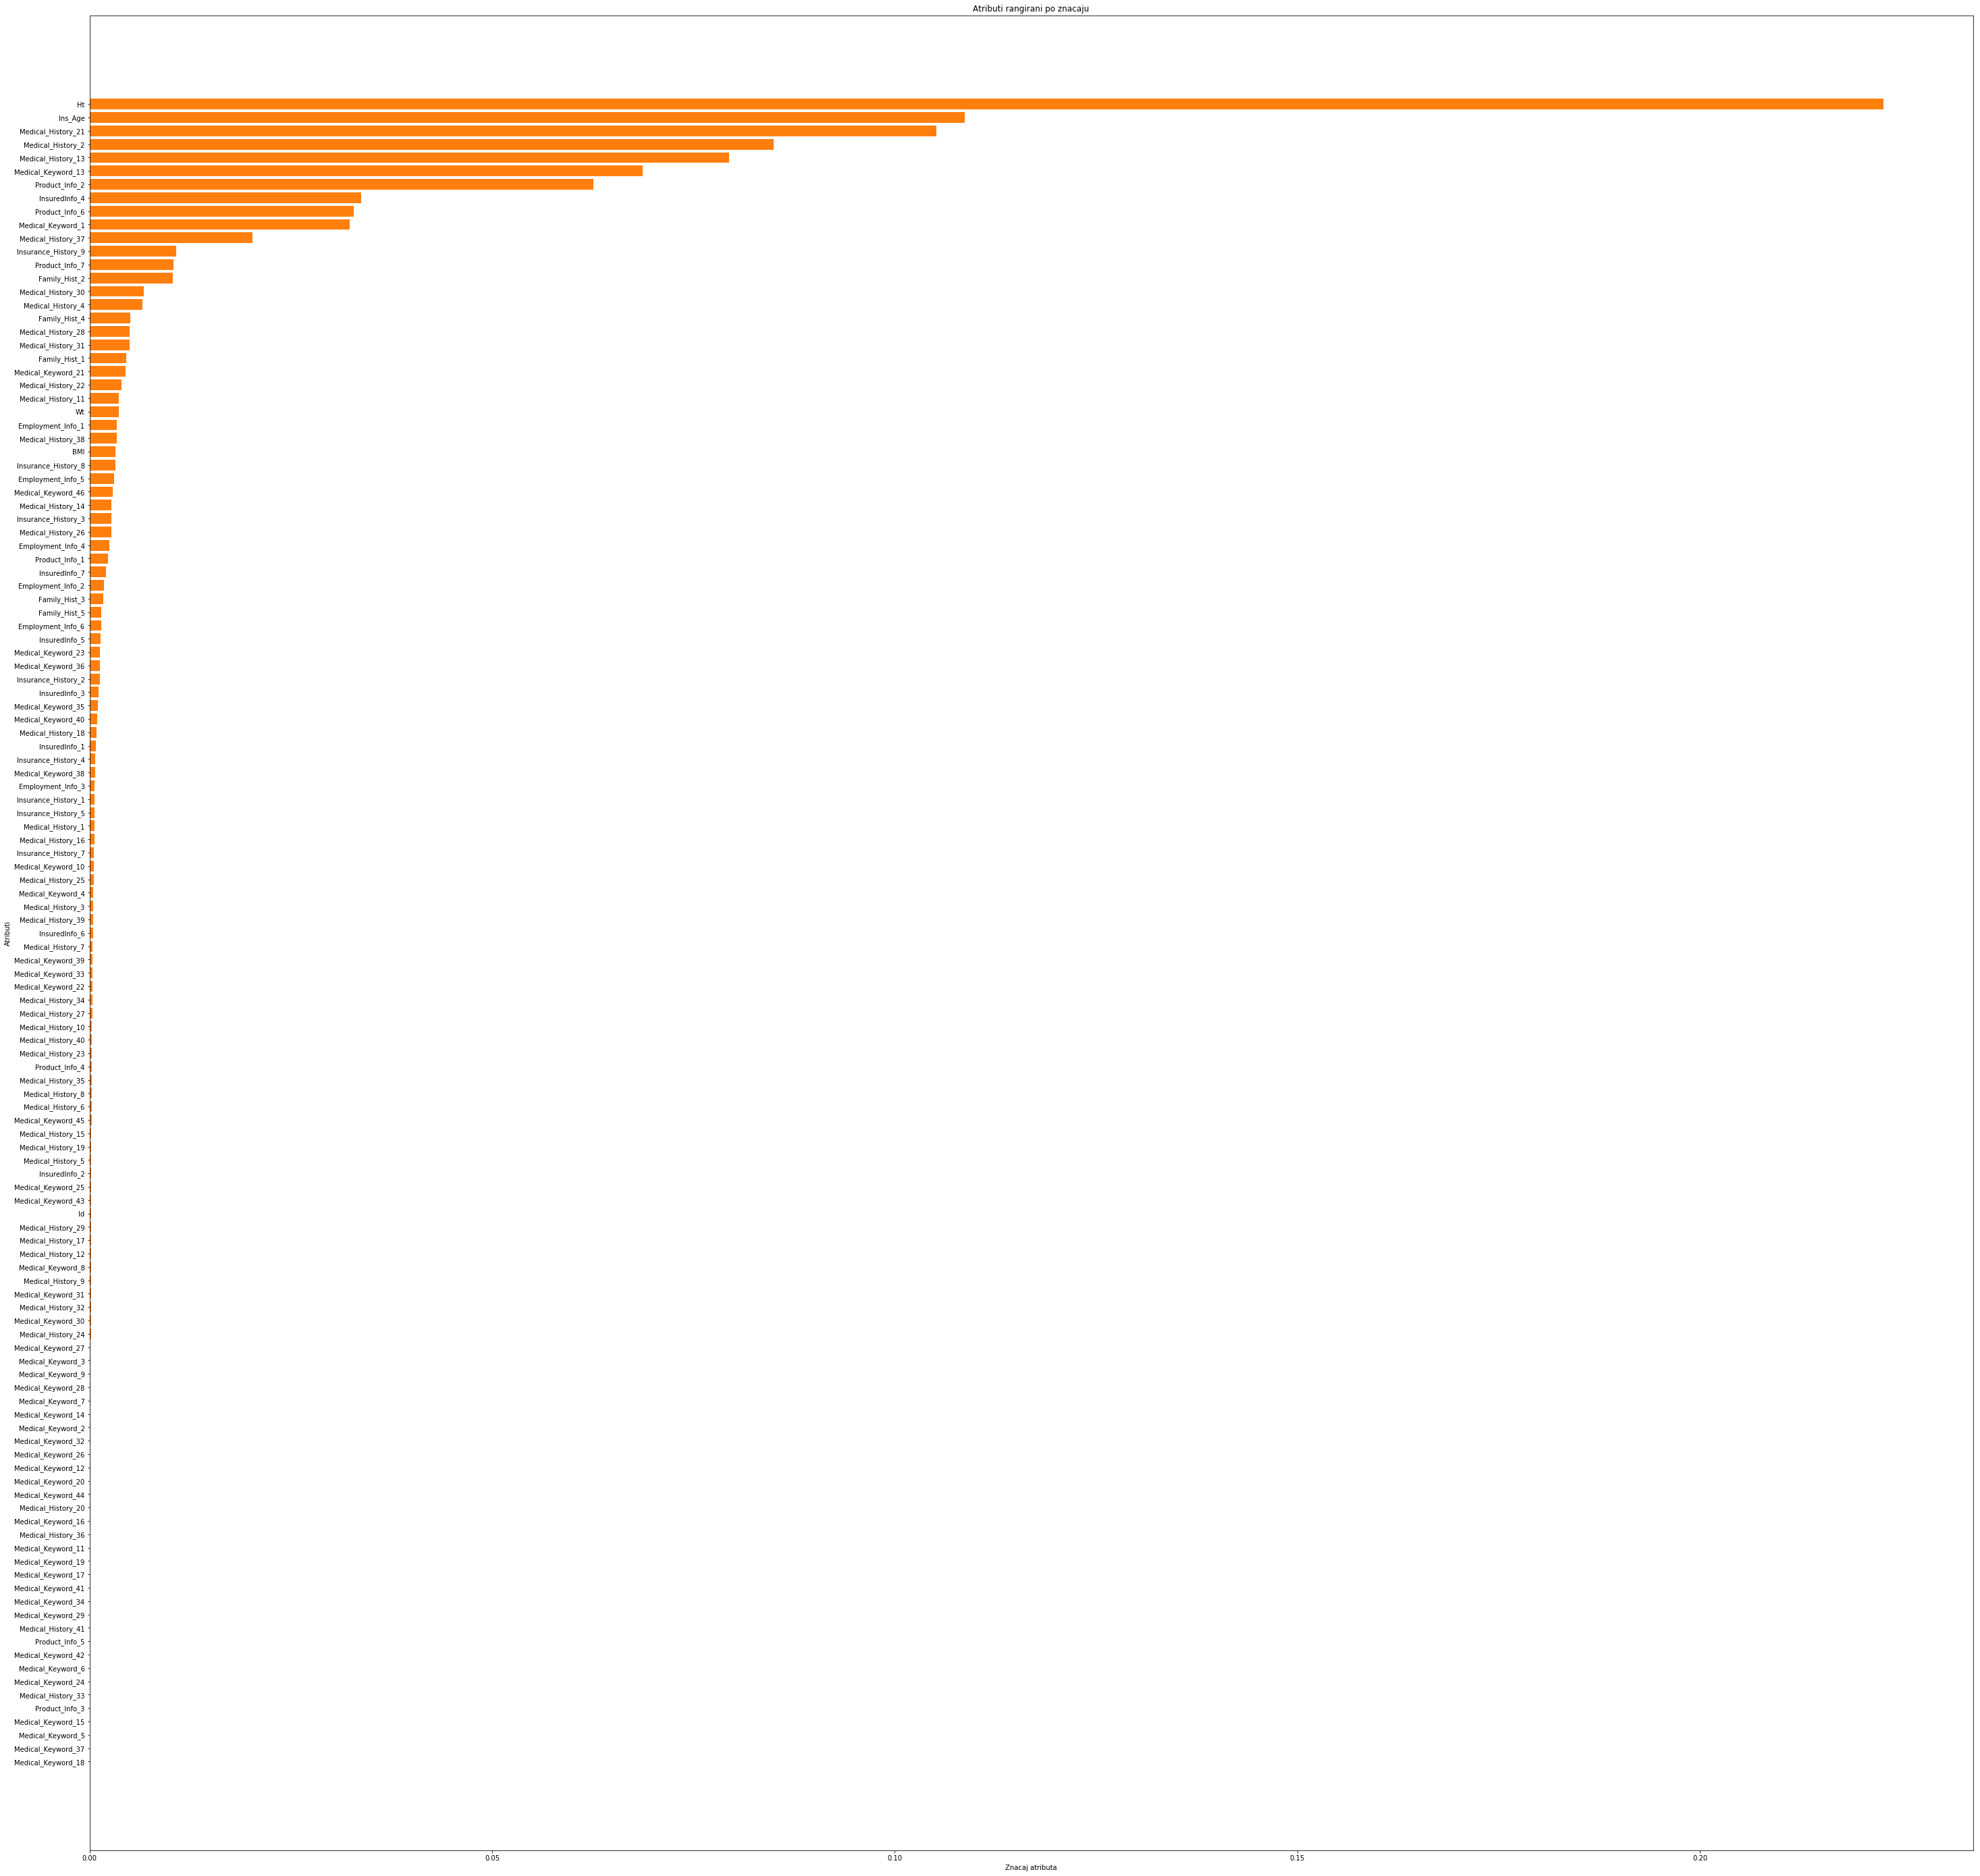

In [58]:
plt.barh(range(len(names)),imp, align='center')
plt.yticks(range(len(names)),names)
plt.xlabel('Znacaj atributa')
plt.ylabel('Atributi')
plt.title('Atributi rangirani po znacaju')
rcParams['figure.figsize'] = 50, 50 
#plt.figure(figsize = (50,50))
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [70]:
accuracy_score(y, predictions_rf)

0.50297233121705598

In [71]:
precision_score(y, predictions_rf,average='micro')

0.50297233121705598

In [72]:
precision_score(y, predictions_rf,average='macro')

0.55880921176991083

In [73]:
precision_score(y, predictions_rf,average='weighted')

0.51848798572109422

In [74]:
recall_score(y, predictions_rf,average='micro')

0.50297233121705598

In [75]:
recall_score(y, predictions_rf,average='macro')

0.33879155655898052

In [76]:
recall_score(y, predictions_rf,average='weighted')

0.50297233121705598

In [77]:
confusion_matrix(y, predictions_rf)

array([[  917,   623,    36,    40,   283,  1634,   419,  2255],
       [  238,  1385,    48,    45,   507,  1804,   348,  2177],
       [  100,    45,   285,    89,    37,   203,     5,   249],
       [   45,     3,    22,   258,     0,   202,    11,   887],
       [   74,   329,     1,     0,  1398,  1908,   103,  1619],
       [  105,   268,     2,     3,    55,  5238,   589,  4973],
       [   16,     6,     0,     0,    12,  2217,  1631,  4145],
       [    1,     2,     0,     0,     7,   546,   178, 18755]], dtype=int64)

In [78]:
f1_score(y, predictions_rf, average='micro')

0.50297233121705598

In [79]:
f1_score(y, predictions_rf, average='macro')

0.37222799354541614

In [81]:
f1_score(y, predictions_rf, average='weighted')

0.44870265241419127

In [33]:
from sklearn.model_selection import cross_val_score

In [83]:
scores1 = cross_val_score(RF, X2, y, cv=5, scoring='precision_micro')

In [85]:
np.average(scores1)

0.49403070132626603

In [86]:
scores2 = cross_val_score(RF, X2, y, cv=5, scoring='recall_micro')

In [87]:
np.average(scores2)

0.50068228279470761

In [88]:
scores3 = cross_val_score(RF, X2, y, cv=5, scoring='f1_micro')

In [89]:
np.average(scores3)

0.49254698227593713

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [138]:
params = [
  {'n_estimators': [20, 40, 100, 300, 500], 'max_depth': [5, 10, 15]} 
 ]

In [136]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(X2):
    fold += 1
    X_train, X_test = X2.iloc[train_idx], X2.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
    optimizer = GridSearchCV(RF, 
                   param_grid=params, 
                   scoring='f1_micro', cv=3,  
                   return_train_score=True, 
                   refit='f1_micro', n_jobs=2)
    
    opt_rf=optimizer.fit(X_train,y_train)
    predictions_opt=opt_rf.predict(X_test)
    score20 = f1_score(y_test, predictions_opt, average = 'micro')
    print("Score for fold %d: %.3f" % (fold, score20)) 


Score for fold 1: 0.563
Score for fold 2: 0.576
Score for fold 3: 0.567
Score for fold 4: 0.567
Score for fold 5: 0.563


In [139]:
np.average(score20)

0.56256315257662515

In [140]:
opt_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
GBR= GradientBoostingClassifier(n_estimators=50, max_depth=3)

In [119]:
GBR_model=GBR.fit(X2,y)

In [136]:
print(GBR_model.feature_importances_)

[  7.65652473e-03   4.54818333e-04   8.87754289e-02   2.07904025e-03
   6.23948537e-05   7.07074461e-04   4.52147211e-02   4.26509728e-03
   4.24693470e-02   1.62407429e-01   1.08036453e-02   7.82806825e-03
   1.22518340e-03   3.03778308e-03   0.00000000e+00   3.66793358e-03
   2.24049488e-03   1.17840292e-02   2.85184241e-03   0.00000000e+00
   8.86261913e-03   1.69852704e-02   9.53232545e-03   2.07441016e-03
   1.12475642e-02   1.99887738e-05   2.43467996e-04   6.58010185e-03
   9.93846607e-04   1.68167914e-04   2.51307027e-03   9.69567711e-03
   1.07275721e-02   1.55483738e-02   1.39259746e-02   1.06014448e-02
   1.31931368e-02   3.24007848e-03   1.69536832e-03   2.96615050e-02
   9.56587970e-03   1.84816535e-03   3.19211952e-03   1.37199326e-04
   1.14968050e-03   4.31544755e-03   2.16895337e-03   0.00000000e+00
   1.35600009e-02   4.66886558e-04   1.77783578e-01   2.02710315e-03
   8.14815402e-04   9.44711688e-03   3.02961554e-03   5.95439330e-03
   4.31505158e-04   4.03671318e-04

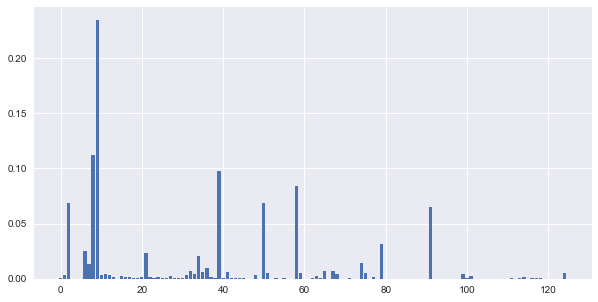

In [126]:
plt.bar(range(len(rf_model.feature_importances_)), rf_model.feature_importances_)
rcParams['figure.figsize'] = 10, 8 
plt.show()

In [102]:
predictions_gbr= GBR_model.predict(X2)

In [103]:
f1_score(y, predictions_gbr, average='micro')

0.5783331368619592

In [104]:
f1_score(y, predictions_gbr, average='macro')

0.50764177496659069

In [105]:
f1_score(y, predictions_gbr, average='weighted')

0.54671980276670706

In [106]:
scores4 = cross_val_score(GBR, X2, y, cv=5, scoring='f1_micro')

In [108]:
np.average(scores4)

0.56853160703252859

In [143]:
params = [
  {'n_estimators': [20, 40, 100, 150], 'max_depth': [5, 10, 15]} 
 ]

In [ ]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(X2):
    fold += 1
    X_train, X_test = X2.iloc[train_idx], X2.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
    optimizer = GridSearchCV(GBR, 
                   param_grid=params, 
                   scoring='f1_micro', cv=3,  
                   return_train_score=True, 
                   refit='f1_micro', n_jobs=2)
    
    opt_rf=optimizer.fit(X_train,y_train)
    predictions_opt=opt_rf.predict(X_test)
    score21 = f1_score(y_test, predictions_opt, average = 'micro')
    print("Score for fold %d: %.3f" % (fold, score21)) 


In [ ]:
np.average(score21)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
LR= LogisticRegression()

In [111]:
LR_model=LR.fit(X2,y)

In [112]:
predictions_lr= LR_model.predict(X2)

In [113]:
f1_score(y, predictions_lr, average='micro')

0.50911907849312066

In [114]:
f1_score(y, predictions_lr, average='macro')

0.40908792982176861

In [115]:
f1_score(y, predictions_lr, average='weighted')

0.47131096798818423

In [116]:
scores5 = cross_val_score(LR, X2, y, cv=5, scoring='f1_micro')

In [117]:
np.average(scores5)

0.50261813946611911

In [2]:
paramsLR = [ 
  {'n_jobs': [1,2], 'fit_intercept' : [True, False], 'multi_class' :['ovr', 'multinomial'], 'max_iter' : [70,100,150]}
 ]
# 'solver' : ['newton-cg', 'lbfgs', 'sag']

In [ ]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(X2):
    fold += 1
    X_train, X_test = X2.iloc[train_idx], X2.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
    optimizer = GridSearchCV(LR, 
                   param_grid=paramsLR, 
                   scoring='f1_micro', cv=3,  
                   return_train_score=True, 
                   refit='f1_micro', n_jobs=2)
    
    opt_lr=optimizer.fit(X_train,y_train)
    predictions_opt_lr=opt_lr.predict(X_test)
    score27 = f1_score(y_test, predictions_opt_lr, average = 'micro')
    print("Score for fold %d: %.3f" % (fold, score27)) 

In [ ]:
np.average(score27)

In [36]:
from sklearn.linear_model import RidgeClassifier

In [37]:
R= RidgeClassifier()

In [26]:
R_model=R.fit(X2,y)

In [27]:
predictions_r= R_model.predict(X2)

In [28]:
f1_score(y, predictions_r, average='micro')

0.46248800121250905

In [123]:
f1_score(y, predictions_r, average='macro')

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.26369942358790849

In [125]:
f1_score(y, predictions_r, average='weighted')

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4000044294768535

In [126]:
scores6 = cross_val_score(R, X2, y, cv=5, scoring='f1_micro')

In [127]:
np.average(scores6)

0.4587831021756833

In [128]:
scores7 = cross_val_score(R, X2, y, cv=10, scoring='f1_micro')

In [129]:
np.average(scores7)

0.45949060047326429

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

In [64]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(X2):
    fold += 1
    X_train, X_test = X2.iloc[train_idx], X2.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
clf = Pipeline([ 
  ('feature_selection', SelectKBest(mutual_info_classif,k=20)),
  ('classification', RidgeClassifier())
 ])

opt_r1=clf.fit(X_train,y_train)
predictions_opt_r1=opt_r1.predict(X_test)
score25 = f1_score(y_test, predictions_opt_r1, average = 'micro')
print("Score: %.3f" % (score25)) 

Score: 0.439


In [66]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(X2):
    fold += 1
    X_train, X_test = X2.iloc[train_idx], X2.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
clf = Pipeline([ 
  ('feature_selection', SelectKBest(chi2,k=50)),
  ('classification', RidgeClassifier())
 ])

opt_r1=clf.fit(X_train,y_train)
predictions_opt_r1=opt_r1.predict(X_test)
score25 = f1_score(y_test, predictions_opt_r1, average = 'micro')
print("Score: %.3f" % (score25))

Score: 0.447


In [101]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(X2):
    fold += 1
    X_train, X_test = X2.iloc[train_idx], X2.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
clf = Pipeline([ 
  ('variance selection' ,VarianceThreshold(threshold=(.1 * (1 - .1)))),
  ('feature_selection', SelectKBest(chi2,k=20)),
  ('classification', RidgeClassifier())
 ])

opt_r1=clf.fit(X_train,y_train)
predictions_opt_r1=opt_r1.predict(X_test)
score26 = f1_score(y_test, predictions_opt_r1, average = 'micro')
print("Score: %.3f" % (score26))

Score: 0.428


In [79]:
selector = VarianceThreshold(threshold=(.1 * (1 - .1)))
selector.fit_transform(X2)

array([[ 10.,   1.,  12., ...,   3.,   3.,   0.],
       [ 26.,   3.,   1., ...,   3.,   1.,   0.],
       [ 26.,   3.,   9., ...,   3.,   1.,   0.],
       ..., 
       [ 26.,   3.,   9., ...,   3.,   1.,   0.],
       [ 10.,   3.,   9., ...,   3.,   3.,   0.],
       [ 26.,   3.,   9., ...,   3.,   1.,   0.]])

In [86]:
selector.get_support(indices=True)

array([ 1,  4, 11, 12, 14, 15, 16, 18, 19, 21, 23, 24, 25, 26, 28, 29, 30,
       31, 36, 37, 38, 39, 41, 44, 45, 48, 50, 51, 56, 58, 59, 60, 61, 64,
       67, 68, 69, 71, 74, 76, 91], dtype=int64)

In [99]:
data_transformed = dataset1.loc[:, selector.get_support()]
print(data_transformed.dtypes)

Product_Info_1           int64
Product_Info_4         float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_4            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_4      int64
Insurance_History_5    float64
Insurance_History_7      int64
Insurance_History_8      int64
Family_Hist_4          float64
Family_Hist_5          float64
Medical_History_1      float64
Medical_History_2        int64
Medical_History_4        int64
Medical_History_7        int64
Medical_History_8        int64
Medical_History_11       int64
Medical_History_13       int64
Medical_History_14       int64
Medical_History_19       int64
Medical_History_21       int64
Medical_History_22       int64
Medical_History_23       int64
Medical_

In [38]:
paramsR = [ 
  {'alpha' : [1.0, 1.5, 2.0],'normalize': [True, False], 'fit_intercept' : [True, False], 'solver' : ['auto', 'svd','sparse_cg']}
 ]

In [39]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(X2):
    fold += 1
    X_train, X_test = X2.iloc[train_idx], X2.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
    optimizer = GridSearchCV(R, 
                   param_grid=paramsR, 
                   scoring='f1_micro', cv=3,  
                   return_train_score=True, 
                   refit='f1_micro', n_jobs=2)
    
    opt_r=optimizer.fit(X_train,y_train)
    predictions_opt_r=opt_r.predict(X_test)
    score23 = f1_score(y_test, predictions_opt_r, average = 'micro')
    print("Score for fold %d: %.3f" % (fold, score23)) 


Score for fold 1: 0.460
Score for fold 2: 0.466
Score for fold 3: 0.456
Score for fold 4: 0.454
Score for fold 5: 0.460


In [40]:
np.average(score23)

0.45958235095991917

In [41]:
opt_r.best_estimator_

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True,
        fit_intercept=False, max_iter=None, normalize=True,
        random_state=None, solver='auto', tol=0.001)

In [131]:
from sklearn.ensemble import ExtraTreesClassifier

In [132]:
ETC=ExtraTreesClassifier(n_estimators=50, max_depth=10)

In [133]:
etc_model=ETC.fit(X2, y)

In [134]:
print(etc_model.feature_importances_)

[  6.86491596e-04   4.74162274e-03   2.17660817e-02   2.44983176e-04
   1.38634730e-03   5.77506649e-04   1.71215171e-02   3.50393040e-03
   7.13773055e-02   1.33215923e-01   1.53910600e-03   2.60018654e-03
   8.58357980e-03   1.08847478e-03   5.42505704e-03   2.50732740e-03
   2.92046332e-03   2.67826102e-03   1.56845964e-03   1.12534852e-03
   4.17921980e-03   4.63217194e-02   4.53231844e-03   1.76587240e-03
   4.57040837e-03   2.45793412e-03   1.71756962e-03   1.23651160e-03
   2.03775944e-03   1.47856467e-03   1.47536659e-03   4.72349195e-03
   5.60087163e-03   2.52991699e-03   4.54920297e-03   2.75147723e-03
   1.58632510e-03   1.41722940e-03   2.02404517e-03   1.10924583e-01
   1.34737181e-03   9.93507743e-03   9.79189514e-04   1.19353340e-03
   1.36442201e-03   4.94374976e-04   3.99240114e-04   1.15963673e-03
   7.97427015e-03   4.02552940e-04   5.26248510e-02   6.13262982e-03
   1.26236944e-03   2.40494372e-03   8.43602169e-04   1.83259387e-03
   1.23751834e-03   6.55187867e-04

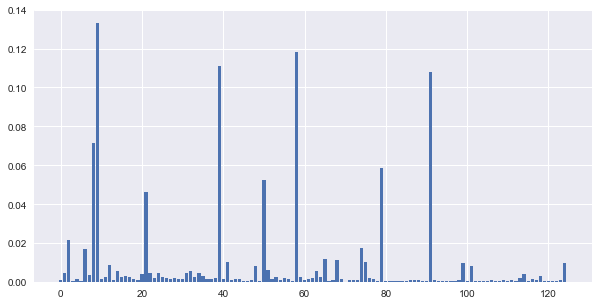

In [141]:
plt.bar(range(len(etc_model.feature_importances_)),etc_model.feature_importances_)
rcParams['figure.figsize'] = 8, 10 
plt.show()

In [149]:
predictions_etc= etc_model.predict(X2)

In [150]:
f1_score(y, predictions_etc, average='micro')

0.4999073777807716

In [151]:
f1_score(y, predictions_etc, average='macro')

0.30284174794459517

In [152]:
f1_score(y, predictions_etc, average='weighted')

0.44218973608755868

In [153]:
scores10 = cross_val_score(ETC, X2, y, cv=5, scoring='f1_micro')

In [154]:
np.average(scores10)

0.45794114713846901

In [155]:
scores11 = cross_val_score(ETC, X2, y, cv=10, scoring='f1_micro')

In [156]:
np.average(scores11)

0.4598933757699073

In [54]:
params = [
  {'n_estimators': [20, 40, 100, 300, 500], 'max_depth': [5, 10, 15]} 
 ]

In [55]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(X2):
    fold += 1
    X_train_etc, X_test_etc = X2.iloc[train_idx], X2.iloc[test_idx]
    y_train_etc, y_test_etc = y[train_idx], y[test_idx] 
    
    optimizer = GridSearchCV(ETC, 
                   param_grid=params, 
                   scoring='f1_micro', cv=3,  
                   return_train_score=True, 
                   refit='f1_micro', n_jobs=2)
    
    opt_rf=optimizer.fit(X_train_etc,y_train_etc)
    predictions_opt=opt_rf.predict(X_test_etc)
    score22 = f1_score(y_test_etc, predictions_opt, average = 'micro')
    print("Score for fold %d: %.3f" % (fold, score22)) 


Score for fold 1: 0.487
Score for fold 2: 0.501
Score for fold 3: 0.486
Score for fold 4: 0.487
Score for fold 5: 0.483


In [56]:
np.average(score22)

0.48341192320646681

In [44]:
import xgboost as xgb

In [45]:
from xgboost import XGBClassifier

In [47]:
XGB = XGBClassifier(n_estimators=50)

In [46]:
XGB_model = XGB.fit(X2, y)

In [25]:
from xgboost import plot_importance
from pylab import rcParams

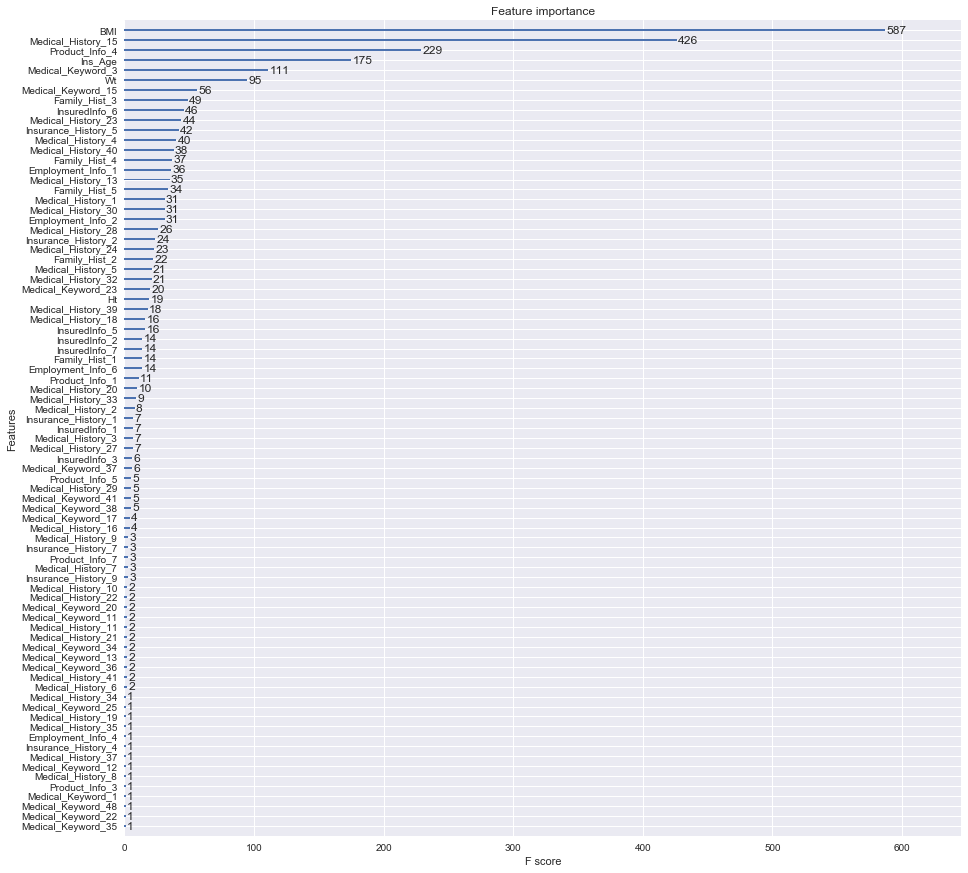

In [103]:
plot_importance(XGB_model)
rcParams['figure.figsize'] = 20, 20 
plt.show()

In [161]:
predictions_xgb= XGB_model.predict(X2)

In [162]:
f1_score(y, predictions_xgb, average='micro')

0.56061703238409588

In [163]:
f1_score(y, predictions_xgb, average='macro')

0.48423393839283613

In [164]:
f1_score(y, predictions_xgb, average='weighted')

0.52177286144265644

In [165]:
scores12 = cross_val_score(XGB, X2, y, cv=5, scoring='f1_micro')

In [166]:
np.average(scores12)

0.55487427662292899

In [44]:
paramsXGB = [
  {'n_estimators': [40, 100, 120], 'max_depth': [3,6,10]} 
 ]

In [45]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(X2):
    fold += 1
    X_train, X_test = X2.iloc[train_idx], X2.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
    optimizer = GridSearchCV(XGB, 
                   param_grid=paramsXGB, 
                   scoring='f1_micro', cv=3,  
                   return_train_score=True, 
                   refit='f1_micro', n_jobs=2)
    
    opt_xgb=optimizer.fit(X_train,y_train)
    predictions_opt_xgb=opt_xgb.predict(X_test)
    score28 = f1_score(y_test, predictions_opt_xgb, average = 'micro')
    print("Score for fold %d: %.3f" % (fold, score28)) 

Score for fold 1: 0.592
Score for fold 2: 0.598
Score for fold 3: 0.590
Score for fold 4: 0.582
Score for fold 5: 0.585


In [46]:
np.average(score28)

0.58521387672617042

In [48]:
opt_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=120,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
7.Algoritam

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
LREG = LogisticRegression(penalty='l1')

In [61]:
LREG_model = LREG.fit(X2, y)

In [55]:
predictions_lreg= LREG_model.predict(X2)

In [58]:
f1_score(y, predictions_lreg, average='micro')

0.50918644010710501

In [59]:
f1_score(y, predictions_lreg, average='macro')

0.40954851932552511

In [60]:
f1_score(y, predictions_lreg, average='weighted')

0.47153902138759163

In [63]:
scores13 = cross_val_score(LREG, X2, y, cv=5, scoring='f1_micro')

In [64]:
np.average(scores13)

0.50416725157339903

In [33]:
paramsLREG = [ 
  {'n_jobs': [1,2], 'fit_intercept' : [True, False],'solver' : ['saga'], 'multi_class' :['ovr', 'multinomial']}
 ]

In [35]:
kf = KFold(n_splits=5)
fold = 0
for train_idx, test_idx in kf.split(X2):
    fold += 1
    X_train, X_test = X2.iloc[train_idx], X2.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx] 
    
    optimizer = GridSearchCV(LREG, 
                   param_grid=paramsLREG, 
                   scoring='f1_micro', cv=3,  
                   return_train_score=True, 
                   refit='f1_micro', n_jobs=2)
    
    opt_lreg=optimizer.fit(X_train,y_train)
    predictions_opt_lreg=opt_lreg.predict(X_test)
    score24 = f1_score(y_test, predictions_opt_lreg, average = 'micro')
    print("Score for fold %d: %.3f" % (fold, score24)) 

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Score for fold 1: 0.457


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Score for fold 2: 0.466


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Score for fold 3: 0.457


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Score for fold 4: 0.456
Score for fold 5: 0.453


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [36]:
np.average(score24)

0.45343550016840689

In [37]:
opt_lreg.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [159]:
a = LREG_model.coef_

In [164]:
(a == 0).sum()

80

In [63]:
from sklearn.feature_selection import SelectFromModel as sk

In [64]:
model= sk(LREG_model, prefit = True)

In [65]:
X_new = model.transform(X2)

In [66]:
print(X2.columns[model.get_support()])

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=124)


In [68]:
data_transformed1 = dataset1.loc[:, model.get_support()]
print(data_transformed1.dtypes)

Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_4      int64
Insurance_History_5    float64
Insurance_History_7      int64
                        ...   
Medical_Keyword_17       int64
Medical_

# Primena rešenja

In [48]:
test = pd.read_csv('C://Users//USER//Desktop//test.csv')

In [49]:
test.shape

(19765, 127)

In [50]:
test1 =  test.fillna(test.mean())

In [51]:
test1.shape

(19765, 127)

In [53]:
Product_info_2_char_test=[]
Product_info_2_number_test=[]
for i in range(len(test1['Product_Info_2'])):
    Product_info_2_char_test.append(test1['Product_Info_2'][i][0])
    Product_info_2_number_test.append(test1['Product_Info_2'][i][1])
test1['Product_Info_2_char']=Product_info_2_char_test
test1['Product_Info_2_number']=Product_info_2_number_test


In [54]:
test1.shape

(19765, 129)

In [52]:
#test1['Medical_keywords_sum']= test1.iloc[:, test1.columns.get_loc("Medical_Keyword_1"):test1.columns.get_loc("Medical_Keyword_48")].sum(axis=1)

In [56]:
test3 = test1.select_dtypes(exclude=['object'])

In [57]:
test3.shape

(19765, 126)

In [58]:
test3.drop('Id', axis=1, inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
test3.shape

(19765, 125)

In [60]:
X2.shape

(59381, 125)

In [62]:
X2.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=125)

In [63]:
test3.shape

(19765, 125)

In [64]:
X2.shape

(59381, 125)

In [65]:
XGBtest = XGBClassifier(n_estimators=120, max_depth=6)

In [66]:
XGB_model_test = XGBtest.fit(X2, y)

In [67]:
predictions_xgb_test= XGB_model_test.predict(test3)

In [68]:
predictions_xgb_test

array([1, 6, 6, ..., 6, 2, 4], dtype=int64)

In [69]:
submission = pd.read_csv('C://Users//USER//Desktop//sample_submission.csv')

In [70]:
submission['Response'] = predictions_xgb_test

In [72]:
submission.head()

,Id,Response
0,1,1
1,3,6
2,4,6
3,9,7
4,12,6


In [73]:
submission.tail()

,Id,Response
19760,79093,8
19761,79099,7
19762,79102,6
19763,79125,2
19764,79129,4


In [75]:
submission.to_csv("submissionTJ.csv", sep=',', index=False)